## Lab Assignment 2 - Madeline SULLY 
## 220015259
## https://github.com/ms524-uni/assignment2


#### First I connect to my GIS:

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

In [100]:
notebook:trust

#### Task 1

In [3]:
n = 91 #define variable
if n % 3 == 0: #create If Else statement and instruct to print outcomes
    print(str(n) + " is divisible by 3.")
else:
    print(str(n) + " is not divisble by 3.") 

91 is not divisble by 3.


#### Task 2

In [4]:
fruit_test = "nectarine"
fruit_bowl = ['kiwi','apple','orange','pear','strawberry'] #creating list and string 
print(" Here is my fruit bowl of acceptable fruits: " + str(fruit_bowl))
print( " And here is my fruit: " + fruit_test) 
     

 Here is my fruit bowl of acceptable fruits: ['kiwi', 'apple', 'orange', 'pear', 'strawberry']
 And here is my fruit: nectarine


In [5]:
test=0
for i in range(len(fruit_bowl)):
    for j in fruit_test:
        if i==j:
            test = 1
if test==1:
    print(fruit_test + " is acceptable!")

if test!=1:
    print(fruit_test + " is not acceptable.")

#here I use the If Else statement to test if nectarine is in my list of fruits 
    

nectarine is not acceptable.


#### Task 3

In [6]:
import math
from math import *

In [7]:

def haversine(lat1, lon1, lat2, lon2):
     
    # distance calculations between Lats and Longs
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # conversion to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c
    
# input coordinates from rando coordinate generator 
if __name__ == "__main__":
    lat1 = 36.83073
    lon1 = 1.62964
    lat2 = 12.8129
    lon2 = 18.51528
#print distance in Kilometres     
    print(haversine(lat1, lon1,lat2, lon2), "K.M.")

3156.314689093768 K.M.


## PART 2 
### Q1: How many trees are of the Quercus or Acer genus?

In [8]:
from arcgis.gis import GIS
gis = GIS("home")

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/arcgis/home/portland_park_trees.csv') #create dataframe

In [8]:
df[['Genus']].value_counts() #finding value counts for Genus attribute

Genus        
Pseudotsuga      6783
Acer             3586
Quercus          2089
Prunus           1333
Pinus             983
                 ... 
Eucommia            1
Eriobotrya          1
Daphniphyllum       1
Schima              1
Illicium            1
Name: count, Length: 117, dtype: int64

### Q1 ANSWER: 
#### There are 3586 Acer Trees and 2089 Quercus trees.

### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [9]:
DBHsub = df[(df['DBH']> 50)] #subset dataframe to DBH greater than 50

In [10]:
DBHsub[['Genus']].value_counts()

Genus         
Sequoiadendron    193
Pseudotsuga       160
Quercus            80
Acer               44
Platanus           20
Sequoia            15
Thuja              12
Populus            10
Tilia               8
Ulmus               7
Cedrus              5
Paulownia           5
Juglans             4
Castanea            3
Fagus               2
Robinia             2
Unknown             2
Catalpa             1
Salix               1
Aesculus            1
Calocedrus          1
Pinus               1
Magnolia            1
Liquidambar         1
Umbellularia        1
Name: count, dtype: int64

### Q2 ANSWER: 
#### There are 80 Quercus trees with a 50+ DBH, and 44 Acer Trees with a 50+ DBH.

### Q3: Which genus has the highest mean DBH out of Quercus, Acer or Fraxinus?

In [11]:
Quercus = df[(df['Genus']=='Quercus')] #subset the three genera
Acer = df[(df['Genus']=='Acer')]
Fraxinus = df[(df['Genus']=='Fraxinus')]

In [12]:
Quercus["DBH"].mean() #use subsets to determine mean DBH

23.56823839157492

In [13]:
Acer["DBH"].mean()

18.419085331846066

In [14]:
Fraxinus["DBH"].mean()

11.033609693877551

### Q3 ANSWER:
#### Quercus has the highest mean DBH

### Q4: How many different species of trees are recorded in the Acer Genus?

In [22]:
Acer['Genus_spec'].value_counts()

Genus_spec
Acer platanoides                 1502
Acer macrophyllum                 490
Acer rubrum                       303
Acer circinatum                   299
Acer pseudoplatanus               211
Acer x freemanii                  207
Acer palmatum                     176
Acer saccharum                    153
Acer campestre                     68
Acer saccharinum                   52
Acer tataricum ssp. ginnala        48
Acer griseum                       44
Acer davidii                        8
Acer grandidentatum 'Schmidt'       6
Acer negundo                        6
Acer buergerianum                   5
Acer japonicum                      4
Acer rufinerve                      2
Acer monspessulanum                 1
Acer heldreichii                    1
Name: count, dtype: int64

### Q4 ANSWER:
#### There are 20 different species in the Acer genus. 

In [23]:
worldcities = pd.read_csv('/arcgis/home/world_cities.csv') #importing file

### Q5

In [24]:
pop_ = worldcities["pop"] #extracting population column

In [25]:
import numpy as np 
def convert(x):
    return x/1000000 #wiriting function to convert all values by 1000000

In [26]:
convert(300) # quick function test


0.0003

In [27]:
pop_M = pop_.apply(convert) #using .apply to apply my function to population column

In [28]:
worldcities["pop"] = pop_M #replacing old pop column with new pop_M values

In [29]:
worldcities.rename(columns={"pop" : "pop_M"}) #renaming column!

,city,country,pop_M,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,0.005629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,0.018999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,0.047788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,0.021817,29.36,47.98,0
4,'Abud,Palestine,0.002456,32.03,35.07,0
...,...,...,...,...,...,...
43640,az-Zubayr,Iraq,0.124611,30.39,47.71,0
43641,az-Zulfi,Saudi Arabia,0.054070,26.30,44.80,0
43642,az-Zuwaytinah,Libya,0.021984,30.95,20.12,0
43643,s-Gravenhage,Netherlands,0.479525,52.07,4.30,0


In [30]:
MidwestCity = worldcities[(worldcities['city']=='Midwest City')] #subsetting a city that starts with the first letter of my name
MidwestCity #exploring it

,city,country,pop,lat,lon,capital
23756,Midwest City,USA,0.05509,35.46,-97.37,0


In [31]:
justUSA = worldcities[worldcities['country']=="USA"] #subset the country of the city i chose 

In [32]:
justUSA = justUSA.sort_values("pop") #sort subset by population, then look at the 5 largest at bottom of dataset

In [33]:
justUSA 

,city,country,pop,lat,lon,capital
39297,Twin Falls,USA,0.039383,42.56,-114.46,0
40467,Vestavia Hills,USA,0.039397,33.43,-86.79,0
8027,Columbus,USA,0.039453,39.21,-85.91,0
22022,Madison,USA,0.039516,34.70,-86.75,0
32749,San Bruno,USA,0.039523,37.62,-122.43,0
...,...,...,...,...,...,...
28856,Phoenix,USA,1.450884,33.54,-112.07,0
14769,Houston,USA,2.043005,29.77,-95.39,0
7366,Chicago,USA,2.830144,41.84,-87.68,0
21435,Los Angeles,USA,3.911500,34.11,-118.41,0


In [34]:
USAbigcities = justUSA[justUSA['pop'] > 1.44]
USAbigcities #having determined that the 5 biggest cities have populations over 1.44 million, use this value to create a new subset of just the 5 largest cities

,city,country,pop,lat,lon,capital
28856,Phoenix,USA,1.450884,33.54,-112.07,0
14769,Houston,USA,2.043005,29.77,-95.39,0
7366,Chicago,USA,2.830144,41.84,-87.68,0
21435,Los Angeles,USA,3.911500,34.11,-118.41,0
25877,New York,USA,8.124427,40.67,-73.94,0


## PART 3

In [81]:
Ulmus_genus = df[(df["Genus"]=="Ulmus")] #subset Ulmus 

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] 

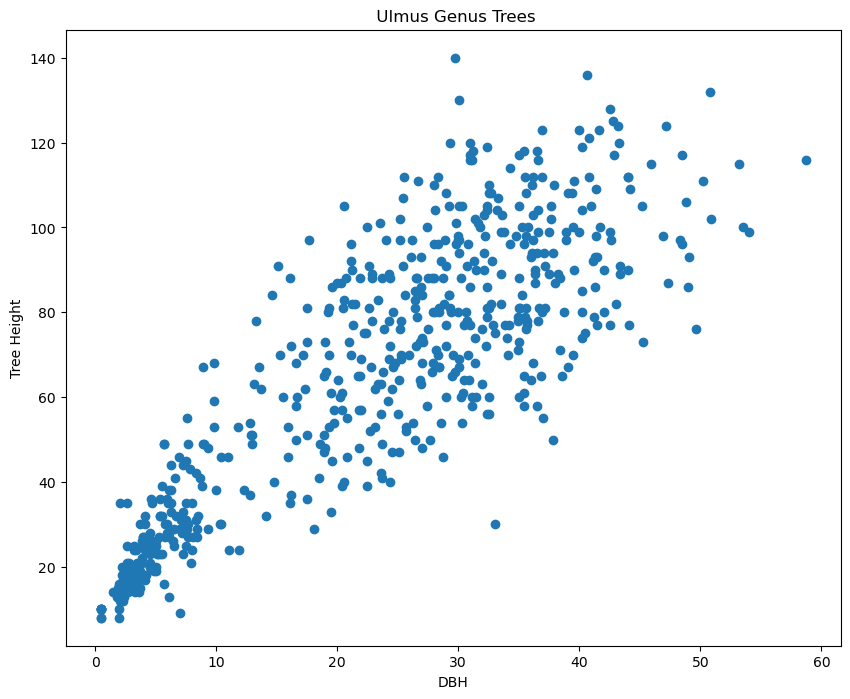

In [37]:
sp1 = plt.scatter(Ulmus_genus.DBH, Ulmus_genus.TreeHeight)
plt.xlabel("DBH")
plt.ylabel("Tree Height")
plt.title(" Ulmus Genus Trees") #scatter for ulmus DBH and Tree Height
plt.show(sp1)

<AxesSubplot: xlabel='DBH', ylabel='TreeHeight'>

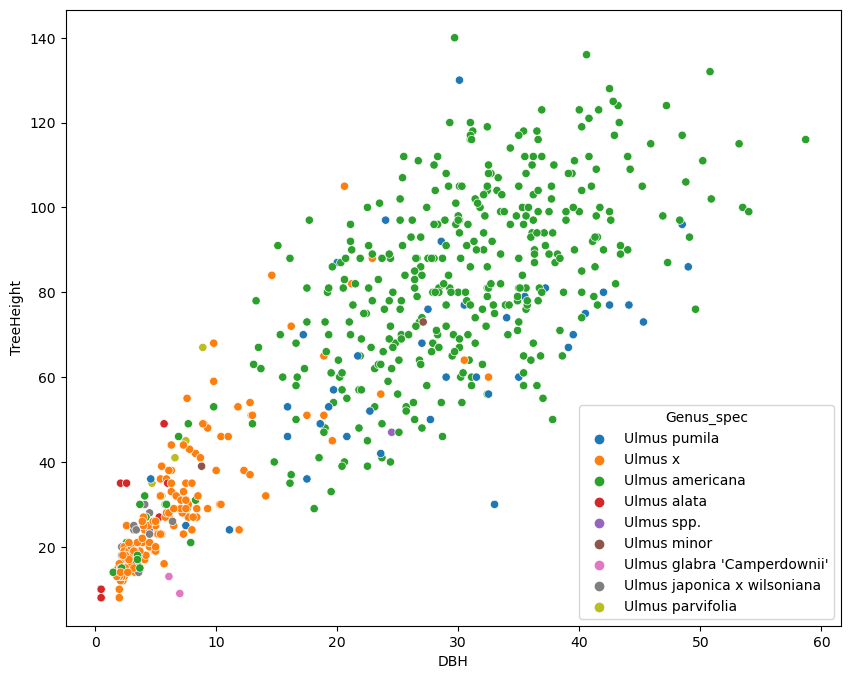

In [38]:
import seaborn as sns

sns.scatterplot(x="DBH",y="TreeHeight", hue="Genus_spec", data = Ulmus_genus)
#using seaborn we can colour our points by a third categorical value (species)

Text(0.5, 1.0, ' Box Plots of Ulmus Genus DBH, by Species')

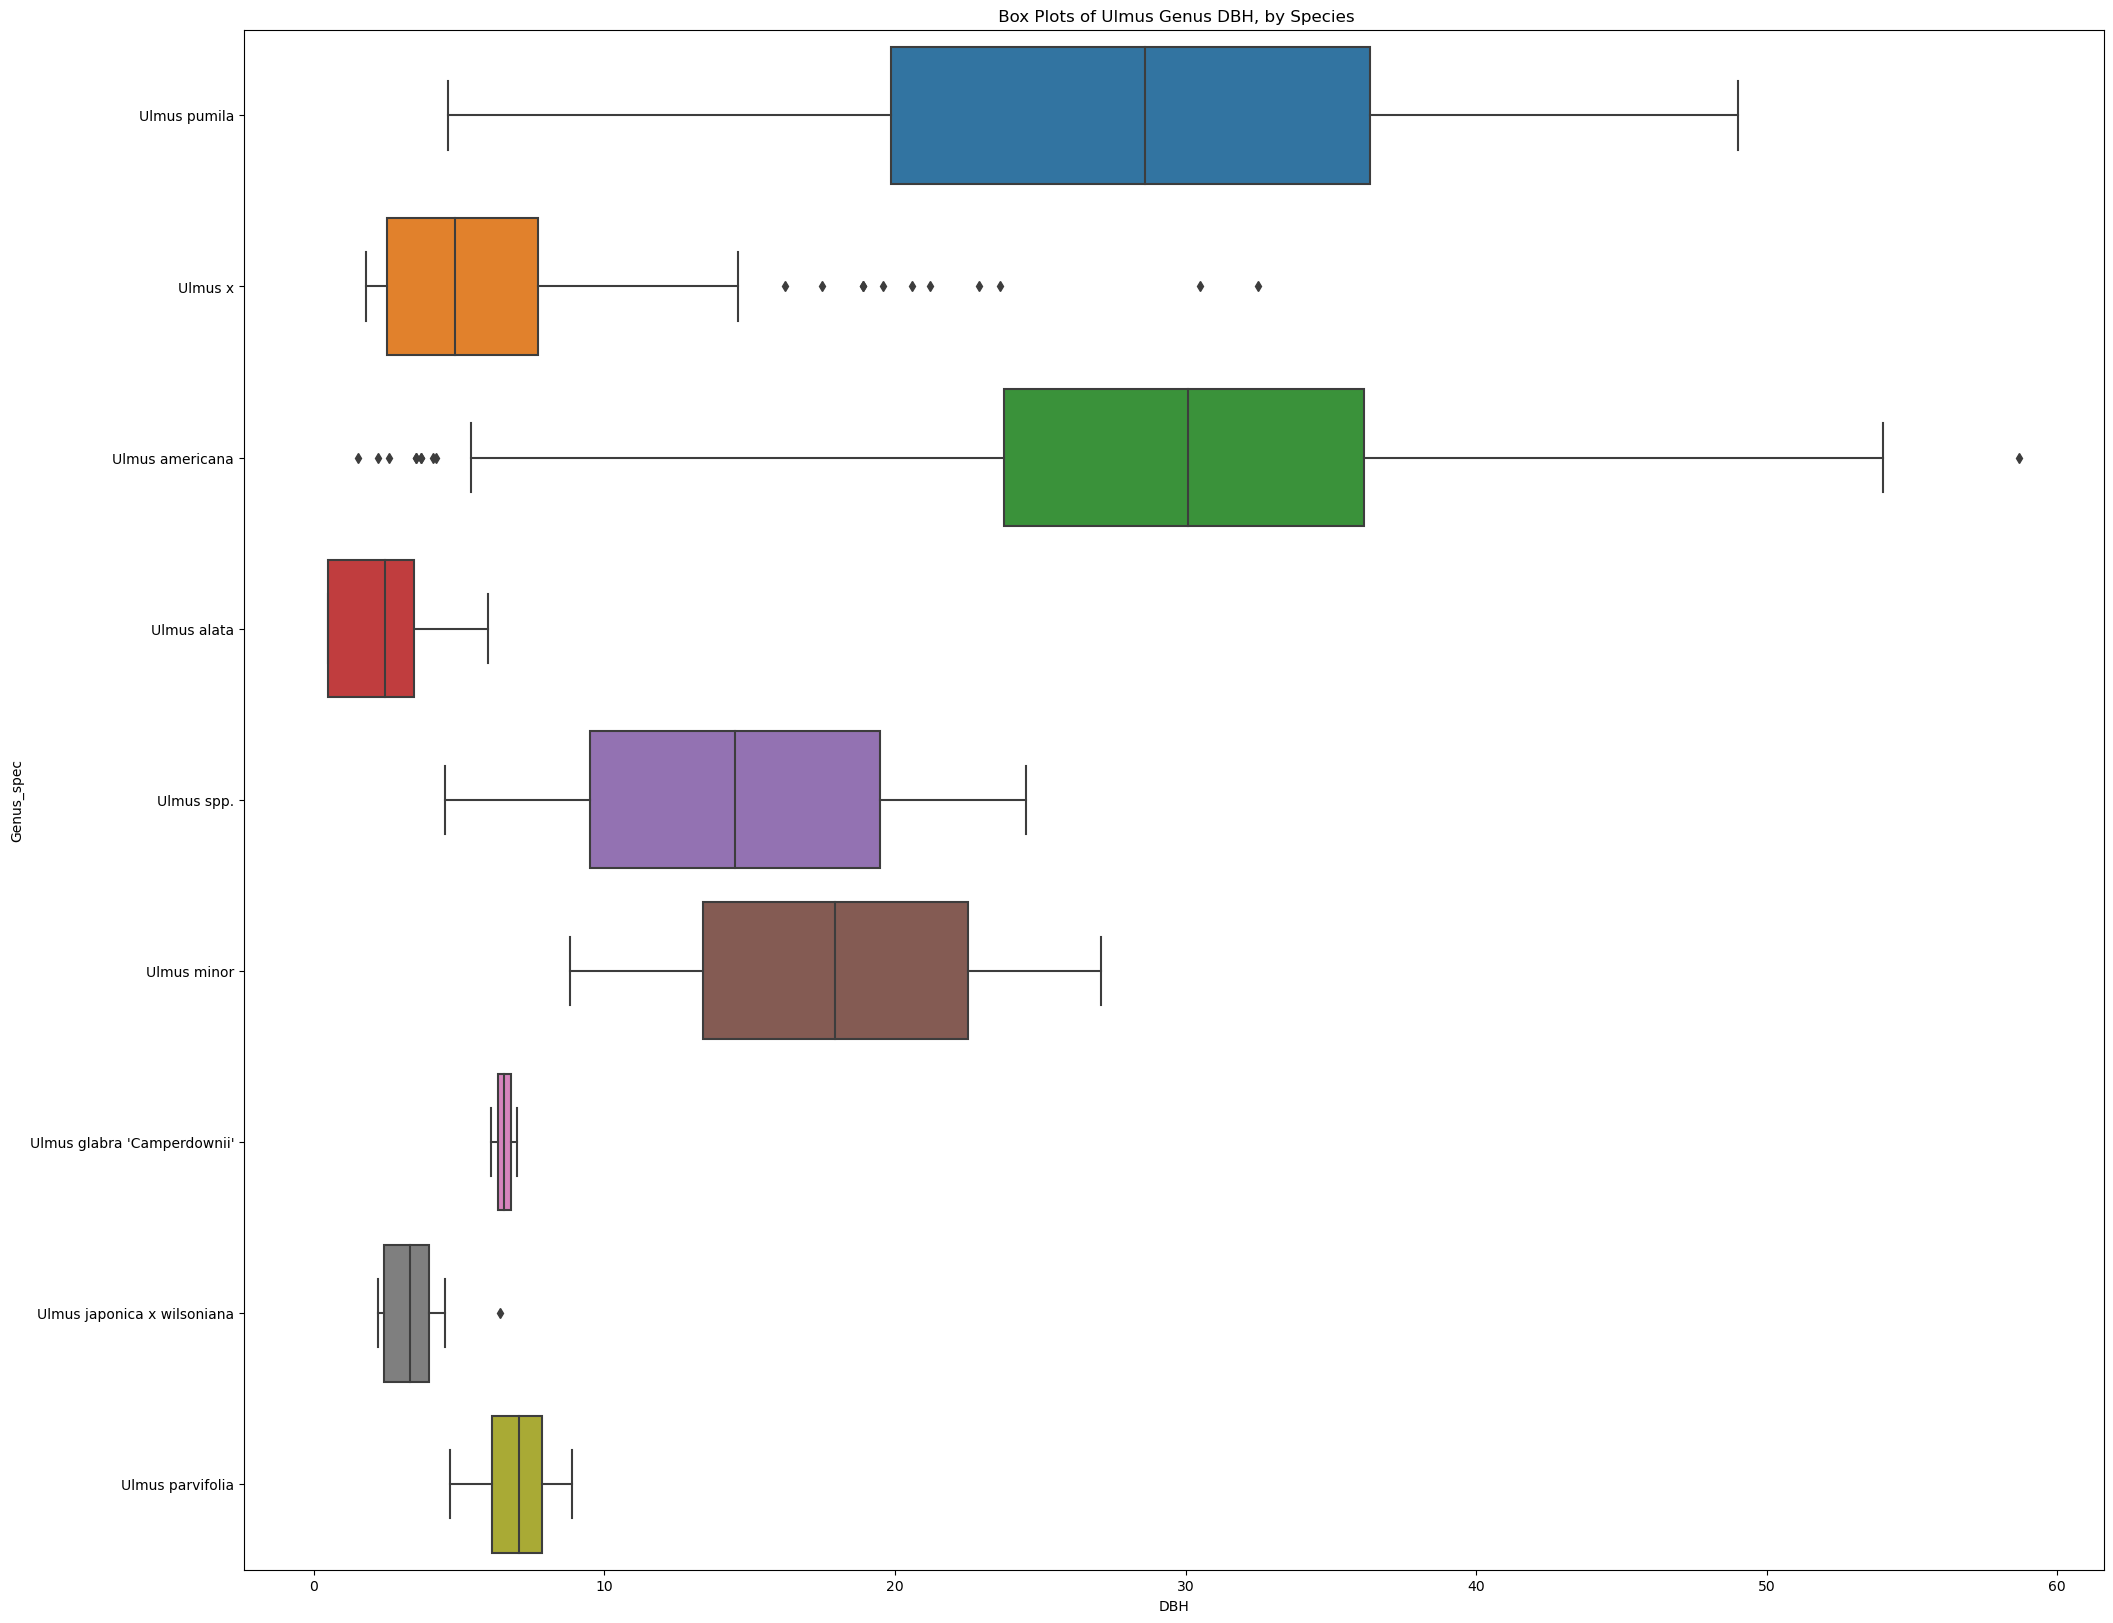

In [39]:
plt.figure(figsize=(24, 20)) #had to make large parameters to fit all the species clearly 
sns.boxplot(data=Ulmus_genus, x= "DBH", y= "Genus_spec")
plt.title(" Box Plots of Ulmus Genus DBH, by Species") #boxplot time

Text(0, 0.5, '')

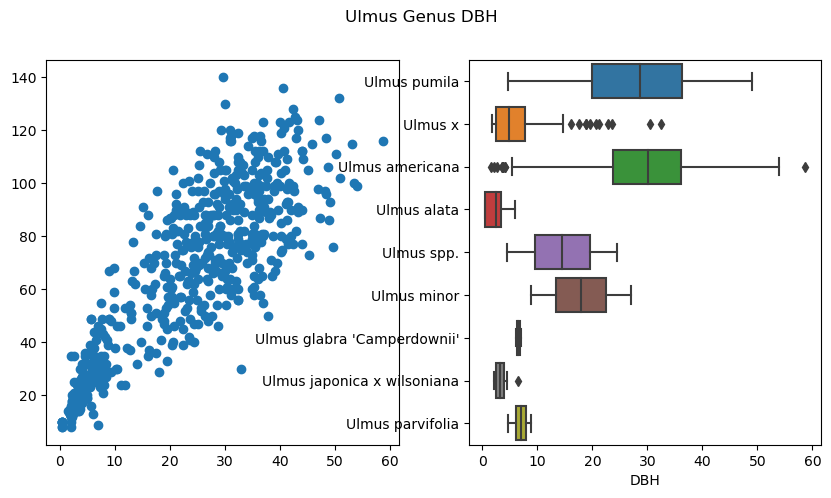

In [40]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Ulmus Genus DBH')
axes[0].scatter(data=Ulmus_genus, x="DBH", y="TreeHeight")
sns.boxplot(ax=axes[1], data=Ulmus_genus, x="DBH", y="Genus_spec") #double plot in one figure 
plt.ylabel("") #remove Y axis labels for clarity

## PART 4 : GEOPANDAS

In [ ]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

## T1

In [92]:
windfarm = gpd.read_file('/arcgis/home/WINDFARM_SCOTLAND.shp') #new Geodataframe using shapefile
                    

## T2 - subset

In [93]:
l5 = windfarm.iloc[722:727] #last five rows subset
l5

,RENEWABLES,NAME,STATUS,TYPE,Shape_Leng,Shape_Area,geometry
722,2128220.0,Sclenteuch Wind Farm,Application,Onshore Wind,17894.102544,8749062.70,"POLYGON ((2.43e+05 6.09e+05, 2.43e+05 6.09e+05..."
723,2148370.0,Drummond Wind Farm,Scoping,Onshore Wind,29714.203971,18400382.00,"POLYGON ((2.62e+05 7.25e+05, 2.63e+05 7.27e+05..."
724,2085408.0,Waternish (Ben Diubaig),Scoping,Onshore Wind,16623.582586,11846240.00,"POLYGON ((1.3e+05 8.55e+05, 1.31e+05 8.57e+05,..."
725,2323177.0,Windburn Wind Farm,Scoping,Onshore Wind,28004.167630,14285656.00,"POLYGON ((2.89e+05 7.08e+05, 2.86e+05 7.05e+05..."
726,2252133.0,Balblair Wind Farm,Scoping,Onshore Wind,14138.366007,6957845.16,"POLYGON ((2.58e+05 8.95e+05, 2.58e+05 8.95e+05..."


In [94]:
f5 = windfarm.iloc[:5] #first five rows subset
f5

,RENEWABLES,NAME,STATUS,TYPE,Shape_Leng,Shape_Area,geometry
0,1816.0,Beinneun wind farm,Approved,Onshore Wind,22123.045148,1.643323e+07,"POLYGON ((2.22e+05 8.1e+05, 2.22e+05 8.1e+05, ..."
1,1863.0,Pearie Law,Approved,Onshore Wind,7810.165365,3.053780e+06,"POLYGON ((3.03e+05 6.6e+05, 3.03e+05 6.6e+05, ..."
2,133818.0,Underheugh,Application,Onshore Wind,1125.411605,6.134959e+04,"POLYGON ((2.2e+05 6.75e+05, 2.2e+05 6.75e+05, ..."
3,379480.0,Brabster,Scoping,Onshore Wind,6877.412055,2.918720e+06,"POLYGON ((3.31e+05 9.69e+05, 3.31e+05 9.69e+05..."
4,68.0,Ark Hill,Installed,Onshore Wind,6237.638821,8.992888e+05,"POLYGON ((3.37e+05 7.42e+05, 3.37e+05 7.42e+05..."


In [95]:
frames = [f5, l5]
merged = pd.concat(frames)
merged #merge the two subsets to get the actual required subset data frame 

,RENEWABLES,NAME,STATUS,TYPE,Shape_Leng,Shape_Area,geometry
0,1816.0,Beinneun wind farm,Approved,Onshore Wind,22123.045148,1.643323e+07,"POLYGON ((2.22e+05 8.1e+05, 2.22e+05 8.1e+05, ..."
1,1863.0,Pearie Law,Approved,Onshore Wind,7810.165365,3.053780e+06,"POLYGON ((3.03e+05 6.6e+05, 3.03e+05 6.6e+05, ..."
2,133818.0,Underheugh,Application,Onshore Wind,1125.411605,6.134959e+04,"POLYGON ((2.2e+05 6.75e+05, 2.2e+05 6.75e+05, ..."
3,379480.0,Brabster,Scoping,Onshore Wind,6877.412055,2.918720e+06,"POLYGON ((3.31e+05 9.69e+05, 3.31e+05 9.69e+05..."
4,68.0,Ark Hill,Installed,Onshore Wind,6237.638821,8.992888e+05,"POLYGON ((3.37e+05 7.42e+05, 3.37e+05 7.42e+05..."
722,2128220.0,Sclenteuch Wind Farm,Application,Onshore Wind,17894.102544,8.749063e+06,"POLYGON ((2.43e+05 6.09e+05, 2.43e+05 6.09e+05..."
723,2148370.0,Drummond Wind Farm,Scoping,Onshore Wind,29714.203971,1.840038e+07,"POLYGON ((2.62e+05 7.25e+05, 2.63e+05 7.27e+05..."
724,2085408.0,Waternish (Ben Diubaig),Scoping,Onshore Wind,16623.582586,1.184624e+07,"POLYGON ((1.3e+05 8.55e+05, 1.31e+05 8.57e+05,..."
725,2323177.0,Windburn Wind Farm,Scoping,Onshore Wind,28004.167630,1.428566e+07,"POLYGON ((2.89e+05 7.08e+05, 2.86e+05 7.05e+05..."
726,2252133.0,Balblair Wind Farm,Scoping,Onshore Wind,14138.366007,6.957845e+06,"POLYGON ((2.58e+05 8.95e+05, 2.58e+05 8.95e+05..."


<AxesSubplot: >

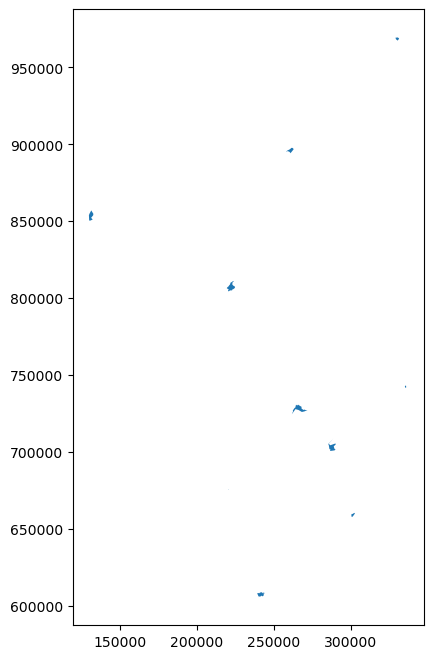

In [96]:
merged.plot() #plot polygons

## T3 - Explore

In [97]:
merged.explore(column ='STATUS', cmap='RdYlBu') #Hover over highlighted areas to see ToolTip

## T4 - CRS

In [26]:
merged.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

#### T4: The CRS is EPSG:27700, British National Grid

## T5 - Features

In [27]:
len(merged.columns)

7

#### There are seven features contained in my dataset. 

## T6- Categorical subset

In [28]:
cat = merged['STATUS'] == "Scoping" #here I made a boolean for the windfarms whose application status is 'Scoping'
cat

0      False
1      False
2      False
3       True
4      False
722    False
723     True
724     True
725     True
726     True
Name: STATUS, dtype: bool

In [52]:
Scoping = merged[cat] #then we use the boolean to make a new categorical subset
Scoping

,RENEWABLES,NAME,STATUS,TYPE,Shape_Leng,Shape_Area,geometry
3,379480.0,Brabster,Scoping,Onshore Wind,6877.412055,2.918720e+06,"POLYGON ((3.31e+05 9.69e+05, 3.31e+05 9.69e+05..."
723,2148370.0,Drummond Wind Farm,Scoping,Onshore Wind,29714.203971,1.840038e+07,"POLYGON ((2.62e+05 7.25e+05, 2.63e+05 7.27e+05..."
724,2085408.0,Waternish (Ben Diubaig),Scoping,Onshore Wind,16623.582586,1.184624e+07,"POLYGON ((1.3e+05 8.55e+05, 1.31e+05 8.57e+05,..."
725,2323177.0,Windburn Wind Farm,Scoping,Onshore Wind,28004.167630,1.428566e+07,"POLYGON ((2.89e+05 7.08e+05, 2.86e+05 7.05e+05..."
726,2252133.0,Balblair Wind Farm,Scoping,Onshore Wind,14138.366007,6.957845e+06,"POLYGON ((2.58e+05 8.95e+05, 2.58e+05 8.95e+05..."


## T7 - Numerical Subset

In [53]:
num = merged['Shape_Leng'] > 12000

In [54]:
Largerset = merged[num] #making a numerical subset for wind farms that have a length longer than 12000
Largerset

,RENEWABLES,NAME,STATUS,TYPE,Shape_Leng,Shape_Area,geometry
0,1816.0,Beinneun wind farm,Approved,Onshore Wind,22123.045148,1.643323e+07,"POLYGON ((2.22e+05 8.1e+05, 2.22e+05 8.1e+05, ..."
722,2128220.0,Sclenteuch Wind Farm,Application,Onshore Wind,17894.102544,8.749063e+06,"POLYGON ((2.43e+05 6.09e+05, 2.43e+05 6.09e+05..."
723,2148370.0,Drummond Wind Farm,Scoping,Onshore Wind,29714.203971,1.840038e+07,"POLYGON ((2.62e+05 7.25e+05, 2.63e+05 7.27e+05..."
724,2085408.0,Waternish (Ben Diubaig),Scoping,Onshore Wind,16623.582586,1.184624e+07,"POLYGON ((1.3e+05 8.55e+05, 1.31e+05 8.57e+05,..."
725,2323177.0,Windburn Wind Farm,Scoping,Onshore Wind,28004.167630,1.428566e+07,"POLYGON ((2.89e+05 7.08e+05, 2.86e+05 7.05e+05..."
726,2252133.0,Balblair Wind Farm,Scoping,Onshore Wind,14138.366007,6.957845e+06,"POLYGON ((2.58e+05 8.95e+05, 2.58e+05 8.95e+05..."


## T8 - Choropleth of Windfarms > 12000 in length. 

<AxesSubplot: >

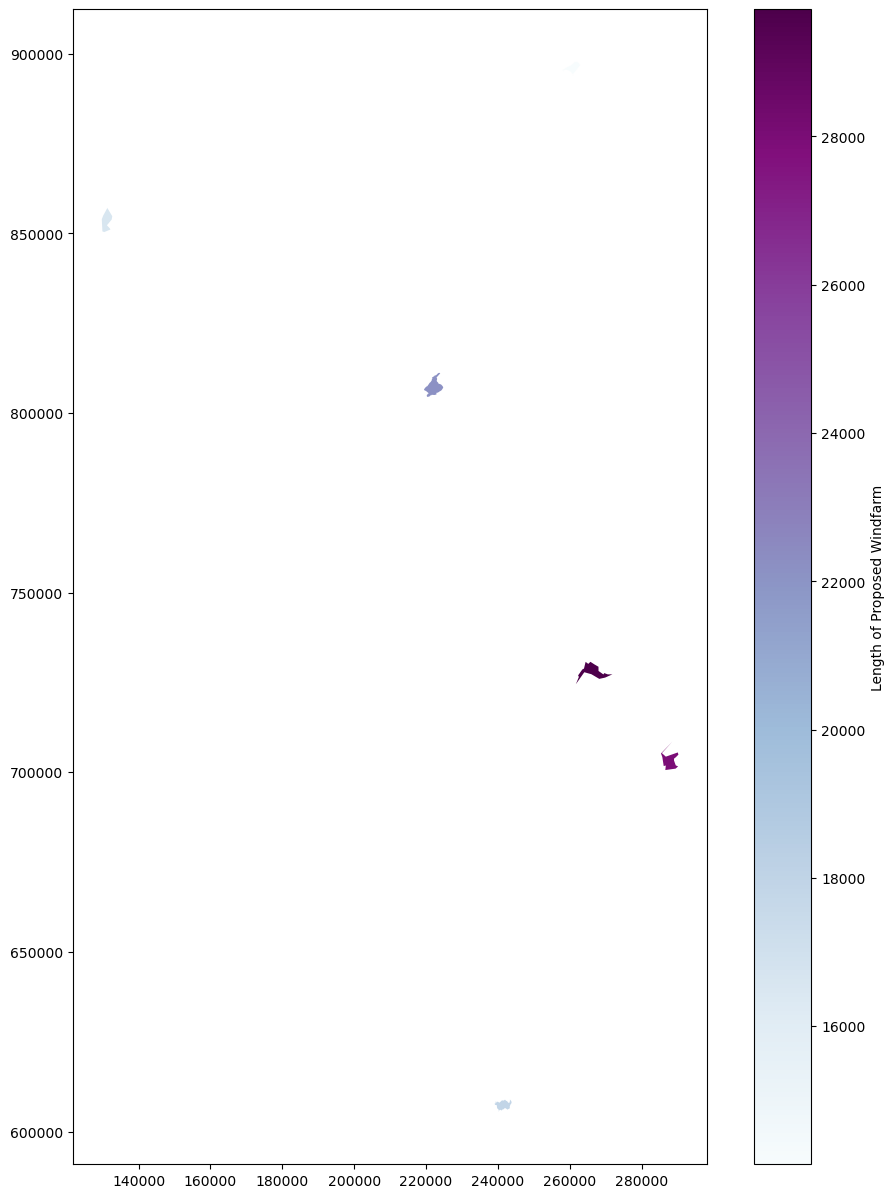

In [55]:
Largerset.plot(column="Shape_Leng", cmap="BuPu", legend=True, figsize=(12,15), legend_kwds={'label': "Length of Proposed Windfarm", 'orientation' : "vertical"}) 

In [ ]:
#choropleth map, showing the longest windfarms from my subset, with darker colours = longer

## Part 5: Rasterio

In [ ]:
pip install earthpy rasterio

In [32]:
import rasterio
from matplotlib import pyplot
from rasterio.plot import show_hist

## T1 - read file

In [33]:
elev = rio.open('/arcgis/home/elev.tif')

## T2 - CRS

In [34]:
print(elev.crs)

EPSG:32617


### this CRS IS: Between 84°W and 78°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Ecuador - north of equator. Canada - Nunavut; Ontario; Quebec. Cayman Islands. Colombia. Costa Rica. Cuba. Jamaica. Nicaragua. Panama. United States (USA). (USED EPSG.IO)

## T3 - Raster description

In [35]:
print(elev.name)
print(elev.count) #no. of bands
print(elev.width)  #dimensions 
print(elev.height) 
print(elev.bounds) #bounding geometry
print(elev.crs) #reference system
print(elev.meta) #all info

/arcgis/home/elev.tif
1
6303
5897
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 6303, 'height': 5897, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(30.0, 0.0, 479753.39945587853,
       0.0, -30.0, 4347733.203759138)}


## T4 - Plot the raster as a map

In [36]:
elev_arr = elev.read(1) #create array from the elevation data
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [37]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))

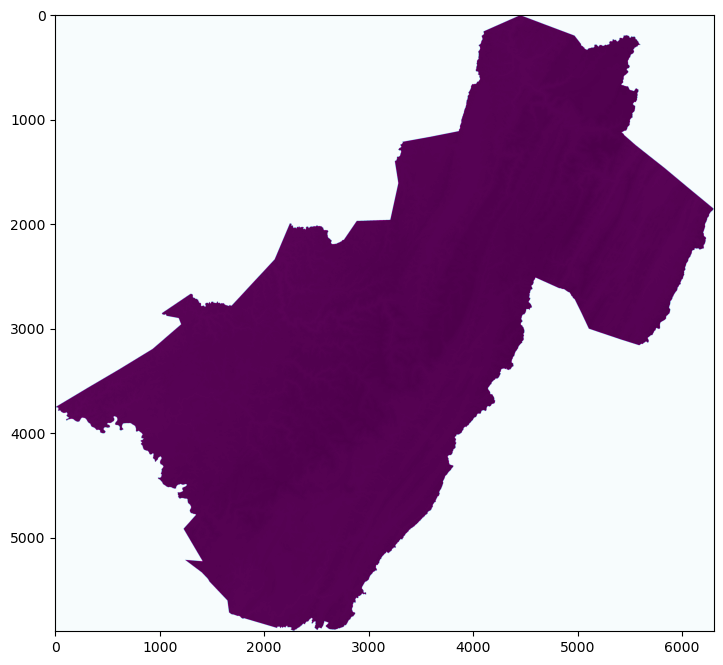

In [38]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="BuPu") #plot array as image. low visiblity and lots of blank areas
plt.show()

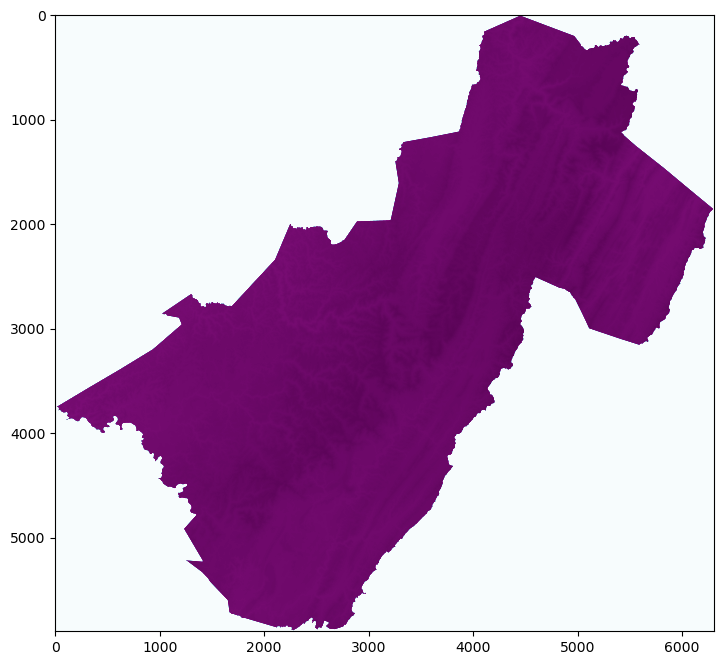

In [39]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="BuPu", vmin=-14000, vmax=2000) #altering mins and maxs to slightly improve visibility

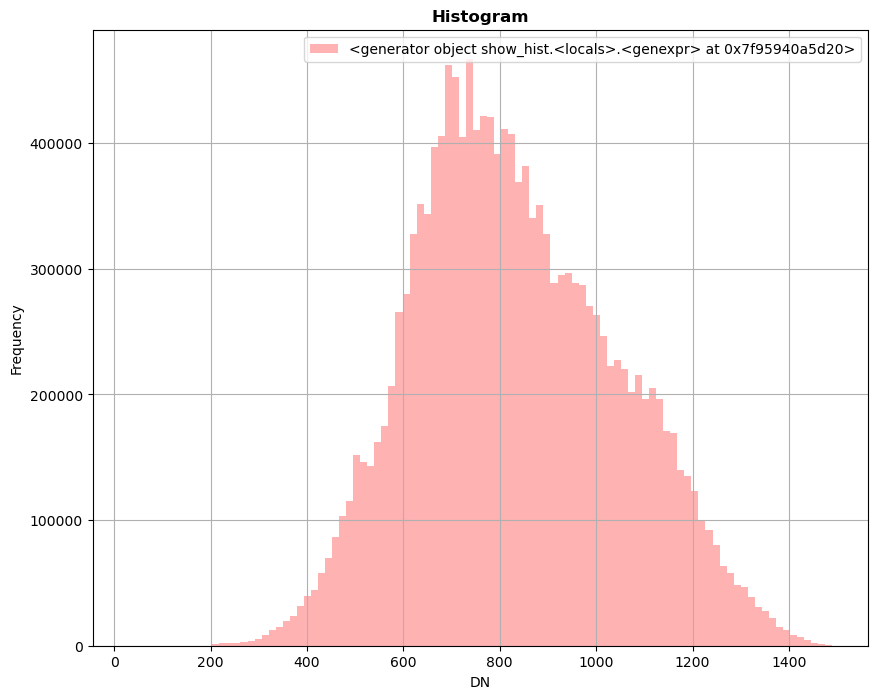

In [40]:
show_hist(elev, bins=100, lw=0.0, 
stacked=False, alpha=0.3,
histtype='stepfilled', title="Histogram") #histogram of elevation data (not array) so i can compare to array histogram


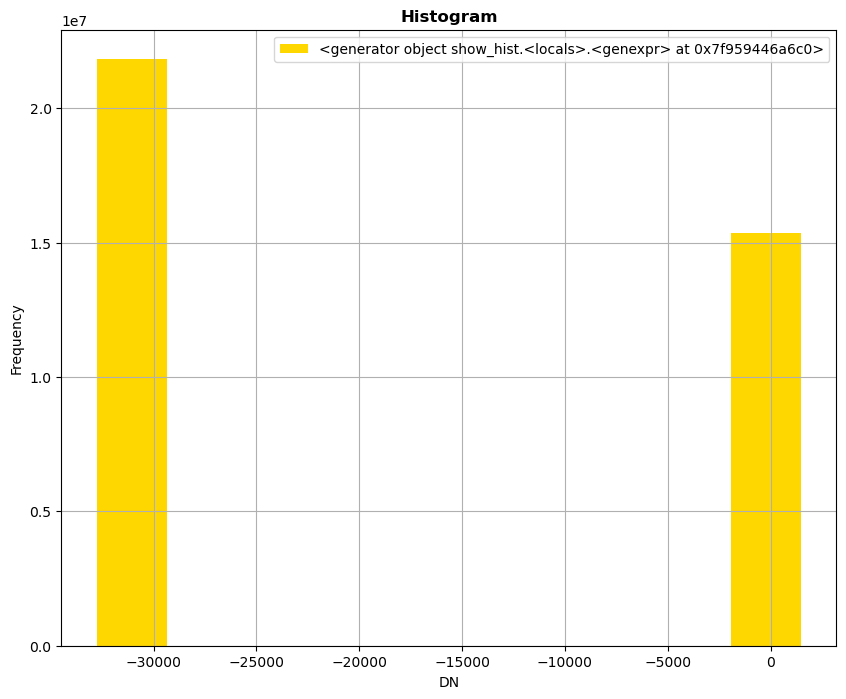

In [41]:
import numpy.ma as ma
show_hist(elev_arr) #hmm... this looks strange... one of these bars must be the outliers
#when I go back and look at the elev.meta information, I observe that 'no data' has been assigned the numerical value -32768. 
##This coincides with the left hand bar of my histogram, so these are the values i must mask

In [44]:
 crop = ma.masked_equal(elev_arr, -32768.0, copy=True) #masking the no data value

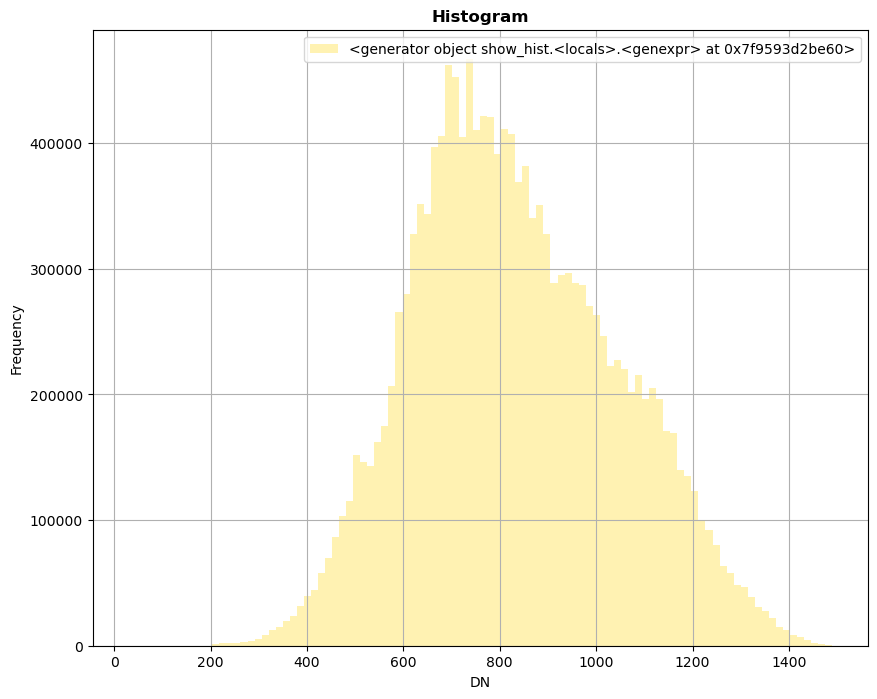

In [45]:
show_hist(crop, bins=100, lw=0.0, 
stacked=False, alpha=0.3,
histtype='stepfilled', title="Histogram") #visualising the masked raster as a histogram
##much better! now it looks like the actual elevation raster histogram

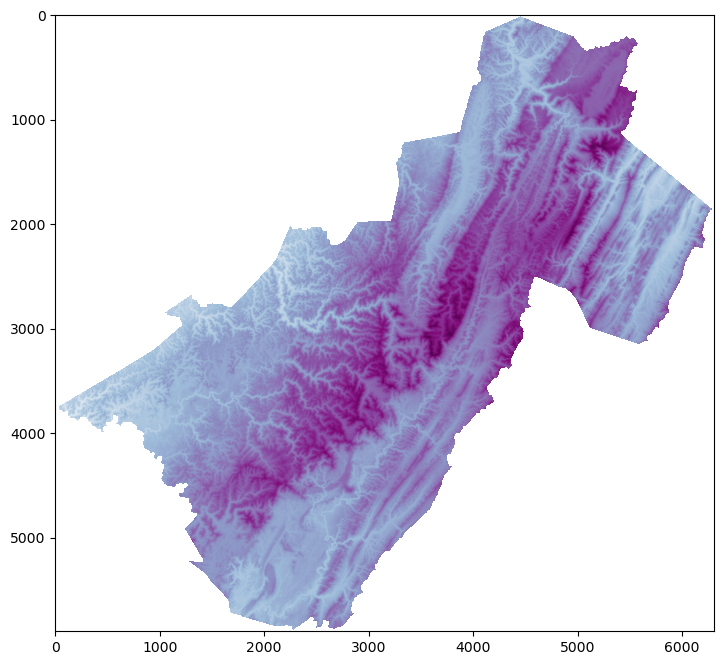

In [46]:
plt.imshow(crop, cmap ="BuPu") ##finally, replotting the raster array with the masked version. #
##look how much better! since we reduced the range of numerical values by masking the outliers, the contrast is better so visibility is improved greatly.
##we can see rivers and tributaries